## load data

In [1]:
setwd("C:/Users/student/Desktop/death")

#### 1) load data from 2009

In [2]:
filelist = choose.files()
datalist =lapply(filelist, FUN=read.table, sep="\t")
from2009 = do.call("rbind", datalist)
names(from2009) = c("신고_년", "신고_월", "신고_일", "주소지", "성별", "사망_년", "사망_월", "사망_일", "사망시간", "사망장소", "사망자직업", "혼인상태", "교육정도", "사망원인1", "사망원인2", "사망연령")

#### 2) 2010~2013 data

In [3]:
filelist = choose.files()
datalist =lapply(filelist, FUN=read.table, sep="\t")
data10to13 = do.call("rbind", datalist) 
names(data10to13) = c("신고_년", "신고_월", "신고_일", "주소지", "성별", "사망_년", "사망_월", "사망_일", "사망시간", "사망장소", "사망자직업", "혼인상태", "교육정도", "사망원인1", "사망원인2", "사망연령", "국적구분", "이전국적명")

#### 3) 2014~2016 data

In [4]:
filelist = choose.files()
datalist =lapply(filelist, FUN=read.table, sep="\t")
data14to16 = do.call("rbind", datalist) 
names(data14to16) = c("신고_년", "신고_월", "신고_일", "주소지", "성별", "사망_년", "사망_월", "사망_일", "사망시간", "사망연령", "사망장소", "사망자직업", "혼인상태", "교육정도", "사망원인1", "사망원인2", "국적구분", "이전국적명", "사망원인 103항목 분류", "사망원인 56항목 분류")

#### create data set

In [36]:
install.packages('gtools', repos='http://cran.us.r-project.org')

package 'gtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\student\AppData\Local\Temp\RtmpA3T561\downloaded_packages


In [5]:
library(gtools)
death = smartbind(from2009, data10to13)
death = smartbind(death, data14to16)

Warning message:
"package 'gtools' was built under R version 3.5.2"Warning message in smartbind(death, data14to16):
"Column class mismatch for '이전국적명'. Converting column to class 'character'."Warning message in smartbind(death, data14to16):
"Column class mismatch for '이전국적명'. Converting column to class 'character'."

In [6]:
head(death)

,신고_년,신고_월,신고_일,주소지,성별,사망_년,사망_월,사망_일,사망시간,사망장소,사망자직업,혼인상태,교육정도,사망원인1,사망원인2,사망연령,국적구분,이전국적명,사망원인 103항목 분류,사망원인 56항목 분류
1:1,2002,1,1,11,1,2002,1,1,17,9,13,3,4,I469,,41,NA,NA,NA,NA
1:2,2002,1,1,21,1,2002,1,1,99,1,13,1,1,T300,Y269,0,NA,NA,NA,NA
1:3,2002,1,1,37,1,2002,1,1,8,2,6,2,4,S068,W189,68,NA,NA,NA,NA
1:4,2002,1,1,38,1,2002,1,1,3,1,6,2,1,I519,,68,NA,NA,NA,NA
1:5,2002,1,2,11,1,2002,1,1,9,1,13,1,1,G120,,0,NA,NA,NA,NA
1:6,2002,1,2,11,1,2002,1,1,11,2,13,2,3,I619,,57,NA,NA,NA,NA


#### 사망원인중 자살 추출하여 데이터셋 생성

In [7]:
num<-600:849
num<-paste0("X",num)
suicide<-data.frame()
for(i in 1:length(num)){
  death_cond = death[death$사망원인2==num[i],]
  suicide<-rbind(suicide,death_cond)
}

### 데이터 파악

#### 1) death data

In [8]:
str(death)

'data.frame':	3849691 obs. of  20 variables:
 $ 신고_년              : int  2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 ...
 $ 신고_월              : int  1 1 1 1 1 1 1 1 1 1 ...
 $ 신고_일              : int  1 1 1 1 2 2 2 2 2 2 ...
 $ 주소지               : int  11 21 37 38 11 11 11 11 11 11 ...
 $ 성별                 : int  1 1 1 1 1 1 1 2 2 2 ...
 $ 사망_년              : int  2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 ...
 $ 사망_월              : int  1 1 1 1 1 1 1 1 1 1 ...
 $ 사망_일              : int  1 1 1 1 1 1 2 1 1 1 ...
 $ 사망시간             : int  17 99 8 3 9 11 7 0 4 9 ...
 $ 사망장소             : int  9 1 2 1 1 2 1 2 2 1 ...
 $ 사망자직업           : int  13 13 6 6 13 13 9 13 13 13 ...
 $ 혼인상태             : int  3 1 2 2 1 2 2 1 4 4 ...
 $ 교육정도             : int  4 1 4 1 1 3 2 1 2 1 ...
 $ 사망원인1            : Factor w/ 4507 levels "A010","A020",..: 1045 2252 2001 1066 837 1085 1220 1082 222 1950 ...
 $ 사망원인2            : Factor w/ 1894 levels "","V021","V029",..: 1 816 274 1 1 1 1 1 1 1 .

In [9]:
summary(death)

    신고_년        신고_월          신고_일          주소지     
 Min.   :2002   Min.   : 1.000   Min.   : 1.00   Min.   :11.00  
 1st Qu.:2005   1st Qu.: 3.000   1st Qu.: 8.00   1st Qu.:22.00  
 Median :2009   Median : 6.000   Median :16.00   Median :31.00  
 Mean   :2009   Mean   : 6.459   Mean   :15.79   Mean   :28.12  
 3rd Qu.:2013   3rd Qu.:10.000   3rd Qu.:24.00   3rd Qu.:35.00  
 Max.   :2017   Max.   :12.000   Max.   :99.00   Max.   :89.00  
                                                                
      성별          사망_년        사망_월          사망_일     
 Min.   :1.000   Min.   :2002   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:1.000   1st Qu.:2005   1st Qu.: 3.000   1st Qu.: 8.00  
 Median :1.000   Median :2009   Median : 6.000   Median :16.00  
 Mean   :1.448   Mean   :2009   Mean   : 6.483   Mean   :15.71  
 3rd Qu.:2.000   3rd Qu.:2013   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :2.000   Max.   :2016   Max.   :12.000   Max.   :31.00  
                                                

In [10]:
# 총 데이터 개수(사망 건수)
Dcount <- nrow(death)
Dcount

[1] 3849691

#### suicide data

In [11]:
str(suicide)

'data.frame':	195075 obs. of  20 variables:
 $ 신고_년              : int  2002 2003 2003 2003 2004 2004 2004 2004 2004 2005 ...
 $ 신고_월              : int  7 5 8 8 1 2 6 10 11 1 ...
 $ 신고_일              : int  2 12 22 28 14 10 24 15 5 18 ...
 $ 주소지               : int  31 34 11 21 38 31 23 11 22 31 ...
 $ 성별                 : int  1 2 1 2 2 1 2 1 1 1 ...
 $ 사망_년              : int  2002 2003 2003 2003 2004 2004 2004 2004 2004 2005 ...
 $ 사망_월              : int  6 5 8 8 1 2 6 10 11 1 ...
 $ 사망_일              : int  27 3 18 21 7 5 20 12 1 13 ...
 $ 사망시간             : int  7 3 3 10 8 3 14 13 5 23 ...
 $ 사망장소             : int  1 2 9 1 2 1 1 2 2 1 ...
 $ 사망자직업           : int  13 13 13 13 5 13 13 13 5 13 ...
 $ 혼인상태             : int  1 3 3 1 2 1 2 1 3 3 ...
 $ 교육정도             : int  5 1 5 4 4 3 3 4 4 3 ...
 $ 사망원인1            : Factor w/ 4507 levels "A010","A020",..: 2272 2272 2275 2275 2272 2272 2272 2273 2272 2272 ...
 $ 사망원인2            : Factor w/ 1894 levels "","V021","V029",..: 591 

In [12]:
summary(suicide)

    신고_년        신고_월         신고_일          주소지           성별      
 Min.   :2002   Min.   : 1.00   Min.   : 1.00   Min.   :11.00   Min.   :1.000  
 1st Qu.:2006   1st Qu.: 4.00   1st Qu.: 8.00   1st Qu.:22.00   1st Qu.:1.000  
 Median :2010   Median : 6.00   Median :16.00   Median :31.00   Median :1.000  
 Mean   :2009   Mean   : 6.53   Mean   :15.74   Mean   :27.31   Mean   :1.322  
 3rd Qu.:2013   3rd Qu.: 9.00   3rd Qu.:23.00   3rd Qu.:34.00   3rd Qu.:2.000  
 Max.   :2017   Max.   :12.00   Max.   :31.00   Max.   :89.00   Max.   :2.000  
                                                                               
    사망_년        사망_월          사망_일        사망시간    
 Min.   :2002   Min.   : 1.000   Min.   : 1.0   Min.   : 0.00  
 1st Qu.:2006   1st Qu.: 4.000   1st Qu.: 8.0   1st Qu.: 7.00  
 Median :2010   Median : 6.000   Median :16.0   Median :12.00  
 Mean   :2009   Mean   : 6.454   Mean   :15.7   Mean   :13.12  
 3rd Qu.:2013   3rd Qu.: 9.000   3rd Qu.:23.0   3rd Qu.:18.00  
 Ma

In [13]:
#자살 데이터 개수(자살 건수)
Scount <- nrow(suicide)
Scount

[1] 195075

### 분석

#### 자살률 계산

In [14]:
pop <- read.csv("연앙인구.csv", stringsAsFactor=FALSE)
pop1 <- t(pop[,c(-2,-3,-4)])
sumpop <- c(pop1[seq(2,16,2),]+pop1[seq(3,17,2),])
sumpop <- matrix(sumpop,nrow =8, ncol = 15, byrow = F)
sumpop <- rbind(sumpop,colSums(pop1[15:nrow(pop1),]))
colnames(sumpop) <- c(2002:2016)
age = c("10대 미만", "10대", "20대", "30대", "40대", "50대", "60대", "70대", "80대 이상","나이 미상")
rownames(sumpop) <- age[1:9]
sumpop

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
10대 미만,6548574,6320015,6087166,5829053,5571175,5360693,5183839,5009916,4838515,4713640,4669718,4643925,4605473,4594285,4581357
10대,6686528,6613683,6617218,6670032,6726012,6782559,6817497,6818286,6810007,6736526,6548280,6323752,6095822,5840085,5586214
20대,8193853,8060752,7871499,7697454,7556958,7404699,7273832,7126950,6927509,6759635,6643071,6575860,6585186,6639679,6695952
30대,8858228,8874752,8899295,8859246,8789634,8714448,8570849,8420914,8324779,8226191,8133118,8018833,7847118,7677907,7538707
40대,7770654,8000165,8190223,8325045,8417973,8498413,8602965,8700672,8715639,8709045,8713419,8756553,8810883,8783314,8716227
50대,4499574,4609404,4785260,5079573,5411367,5701710,5991650,6324325,6726716,7175713,7537309,7786323,8000583,8148784,8247924
60대,3416878,3565445,3640880,3674784,3701994,3789399,3909750,4006144,4092725,4150538,4217735,4343385,4529945,4824618,5151264
70대,1597413,1670599,1766471,1889791,2019758,2145193,2269326,2405240,2536642,2671439,2845487,2994554,3081420,3130970,3173638
80대 이상,4384703,4620248,4870428,5124522,5391267,5723355,6058923,6345329,6609305,6871012,7200491,7583753,7980713,8382452,8760153


#### 연령대별 범주화

In [15]:
suicide$사망연령 = as.numeric(suicide$사망연령)
table(suicide$사망연령)


   6    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22 
   1    3    9   17   39  103  208  276  461  650  767  857 1153 1406 1259 1559 
  23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38 
1713 1961 2104 2249 2378 2580 2726 2717 2922 2948 3076 3048 3150 3267 3211 3275 
  39   40   41   42   43   44   45   46   47   48   49   50   51   52   53   54 
3419 3531 3593 3814 3747 3851 3820 3901 3917 3928 3912 3913 3767 3842 3737 3551 
  55   56   57   58   59   60   61   62   63   64   65   66   67   68   69   70 
3474 3269 3009 3022 2770 2815 2800 2701 2720 2702 2606 2690 2696 2761 2909 2756 
  71   72   73   74   75   76   77   78   79   80   81   82   83   84   85   86 
2861 2831 2793 2680 2632 2465 2349 2281 2110 1954 1808 1646 1478 1267 1088  990 
  87   88   89   90   91   92   93   94   95   96   97   98   99  100  101  102 
 836  709  544  474  321  281  193  152   98   58   42   24   11   18    4    2 
 103  104  105  106  107  1

In [16]:
suicide$group = cut(suicide$사망연령, c(-Inf,9,19,29,39,49,59,69,79,109,Inf),
                    labels=age)

#### 우리나라 자살률

In [17]:
year = 0
k<-matrix(nrow=10, ncol = 15)
for(i in 1:15){
  year = subset(suicide, suicide$사망_년==2001+i, drop=F)
  year = table(year$group)
  for(j in 1:10)
    k[j,i] <- as.numeric(year[[j]])
}
year_age = k
year_age[9,] = year_age[9,] + year_age[10,]
year_age = year_age[-10,]
colnames(year_age)<-c(2002:2016)
rownames(year_age)<-age[1:9]
for (i in 1:9){
  year_age[i,] = year_age[i,]*100000/sumpop[i, ] 
}

In [18]:
year_sum = colSums(k)
pop2 <- t(pop[,c(-2,-3)])
year_death_per = as.data.frame(year_sum*100000/pop2[2,])
years = c(2002:2016)
year_death_per = cbind(years, year_death_per)
colnames(year_death_per) = c("year", "rate")

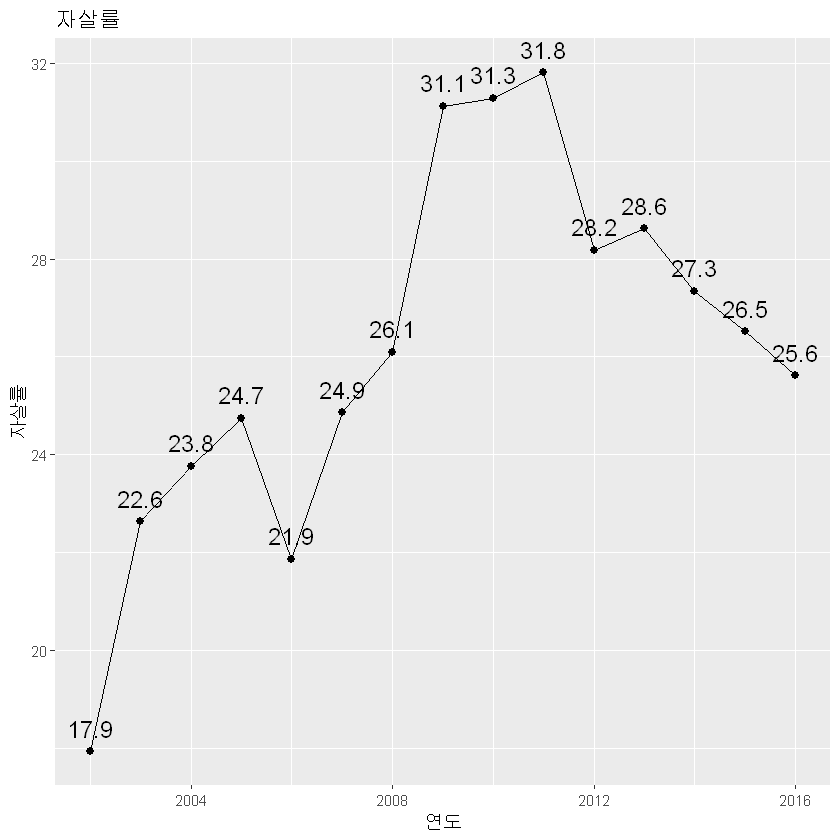

In [19]:
library(ggplot2)
ggplot(year_death_per, aes(x=year,y=rate))+
  geom_line()+
  geom_point(size=2) +
  ggtitle("자살률") +labs(list(x="연도", y="자살률"))+
  geom_text(aes(label=round(rate,1)), size=5, vjust=-0.8)

#### oecd 자살률과 비교

In [21]:
setwd("C:/Users/student/Desktop")

In [22]:
oecd = read.csv("suicide_oecd.csv", header=TRUE, sep='\t')
oecd_time = oecd[oecd$TIME>=1985,]
oecd_tot = oecd_time[oecd_time$SUBJECT=="TOT",]
oecd_loca = oecd_tot[oecd_tot$LOCATION=="KOR"|
                       oecd_tot$LOCATION=="JPN"|
                       oecd_tot$LOCATION=="HUN"|
                       oecd_tot$LOCATION=="FIN"|
                       oecd_tot$LOCATION=="USA",]

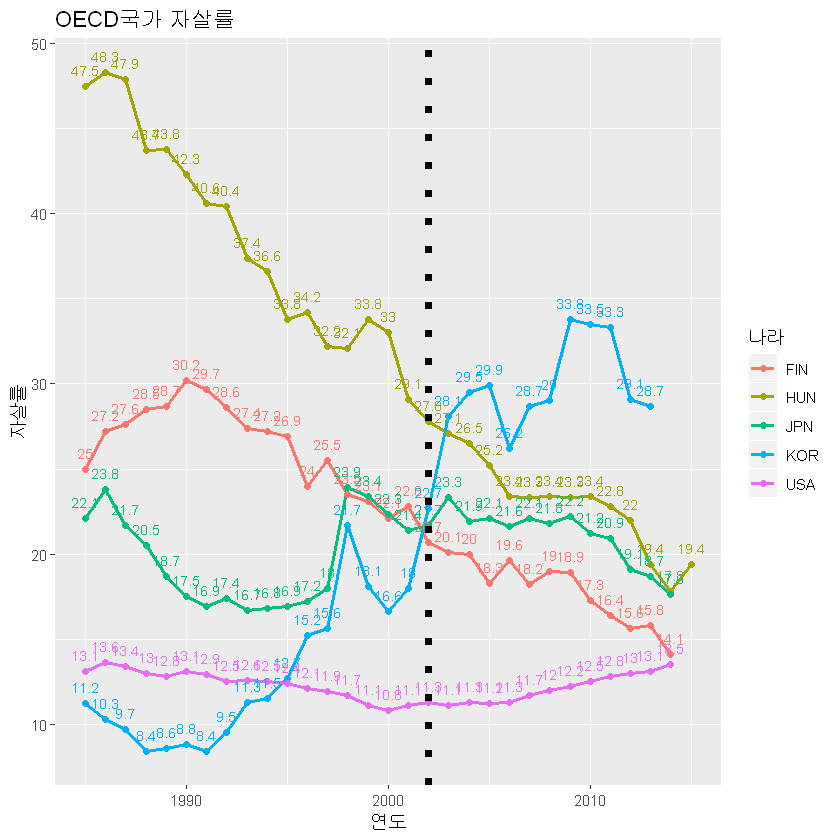

In [23]:
ggplot(oecd_loca, aes(x=TIME, y=Value, colour=LOCATION, group=LOCATION)) +
  geom_line(size=1.1) +
  geom_point(size=1.5) +
  labs(list(title="OECD국가 자살률", x="연도", y="자살률", colour="나라"))+
  geom_text(aes(label=Value), size=3, vjust=-1, show.legend=FALSE)+
  geom_vline(xintercept=2002, linetype='dotted', color='black', size=2)

#### 자살 날짜별 빈도

Loading required package: lattice
Loading required package: grid
Loading required package: chron
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'chron'"

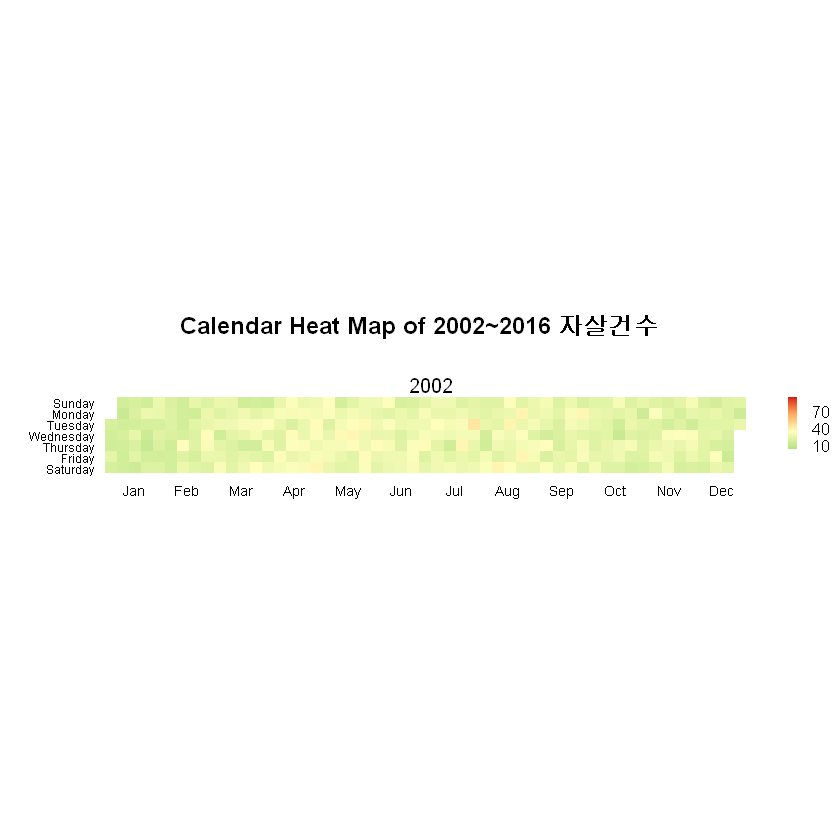

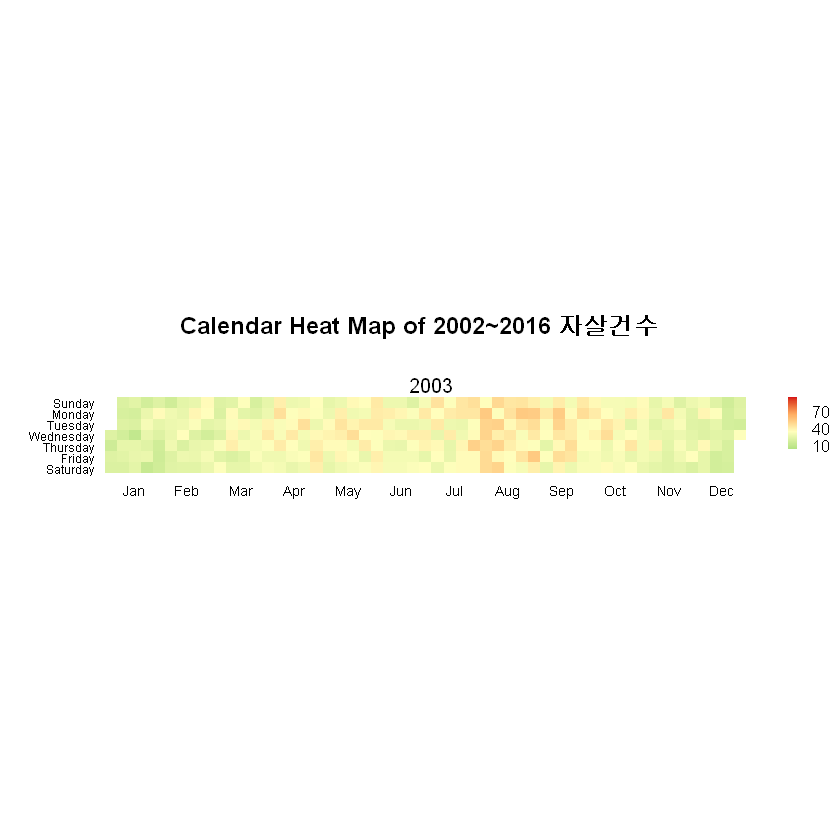

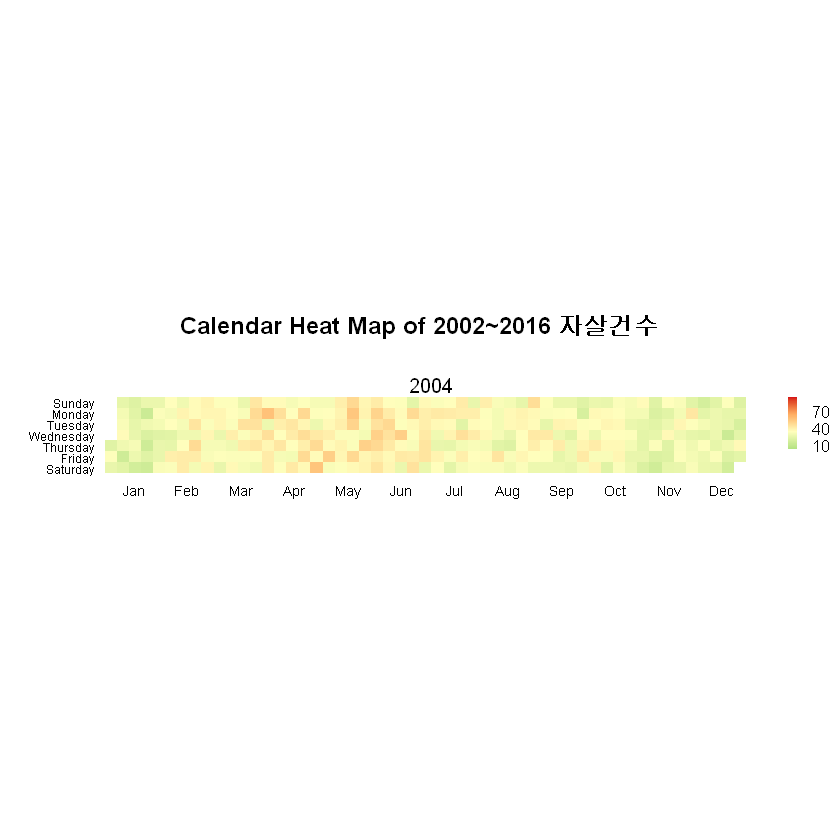

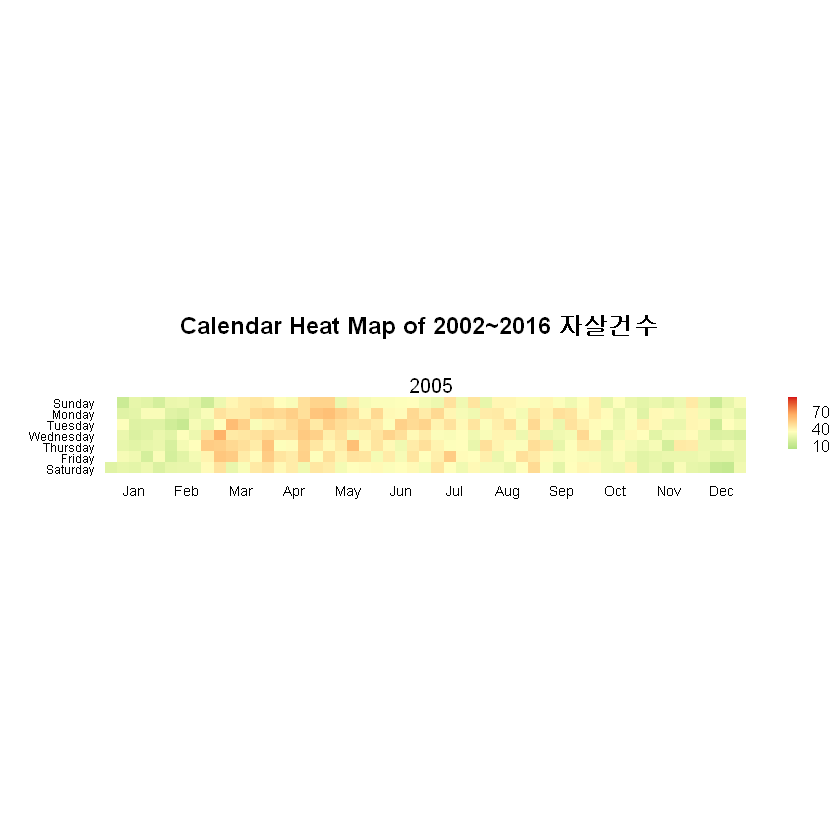

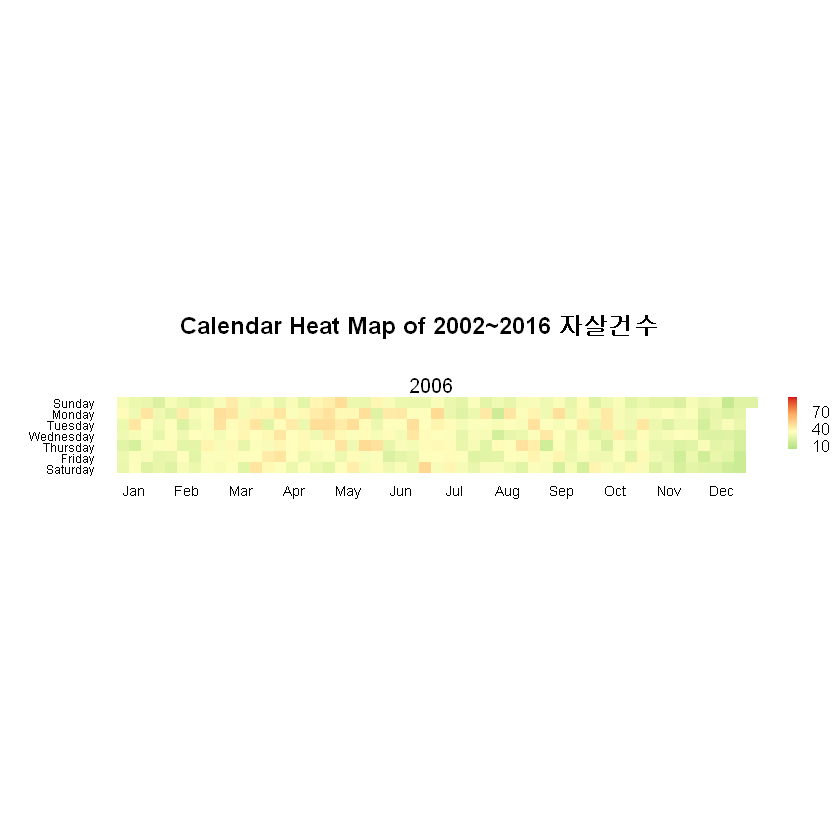

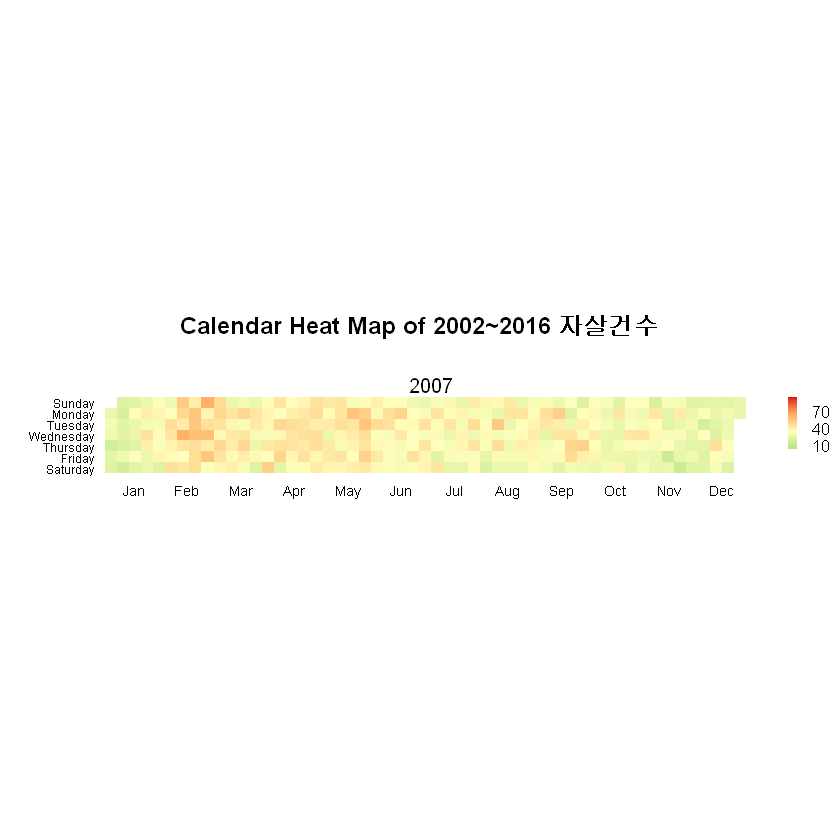

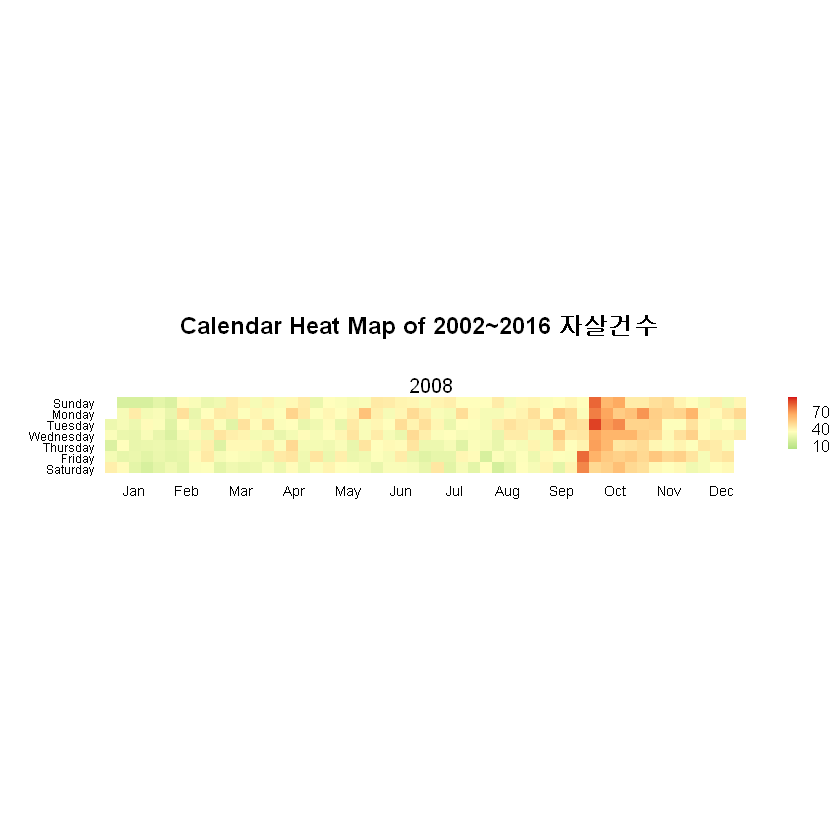

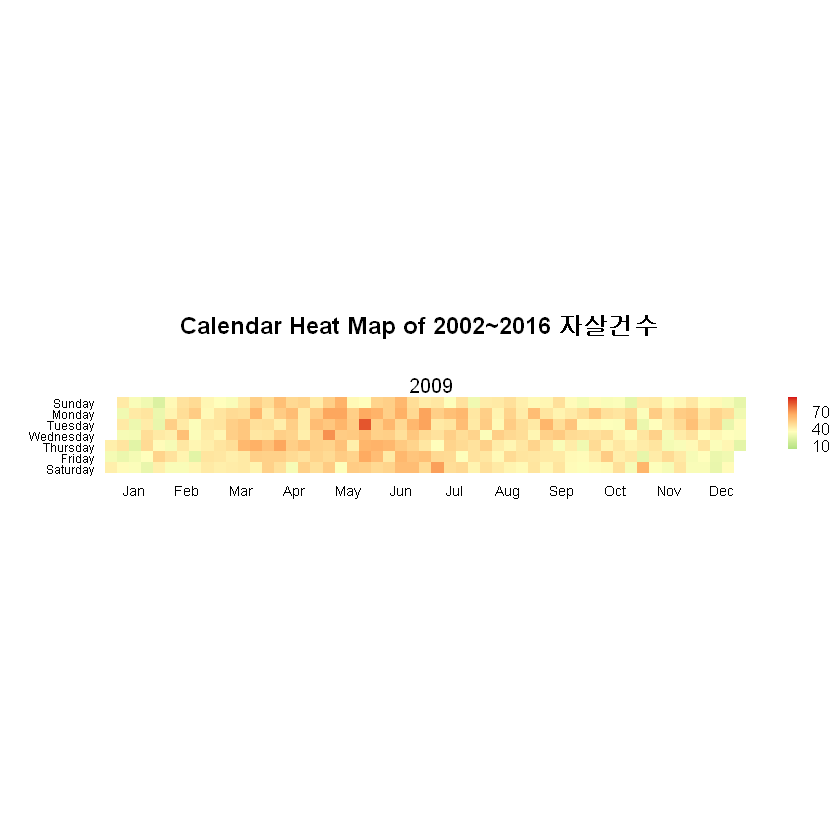

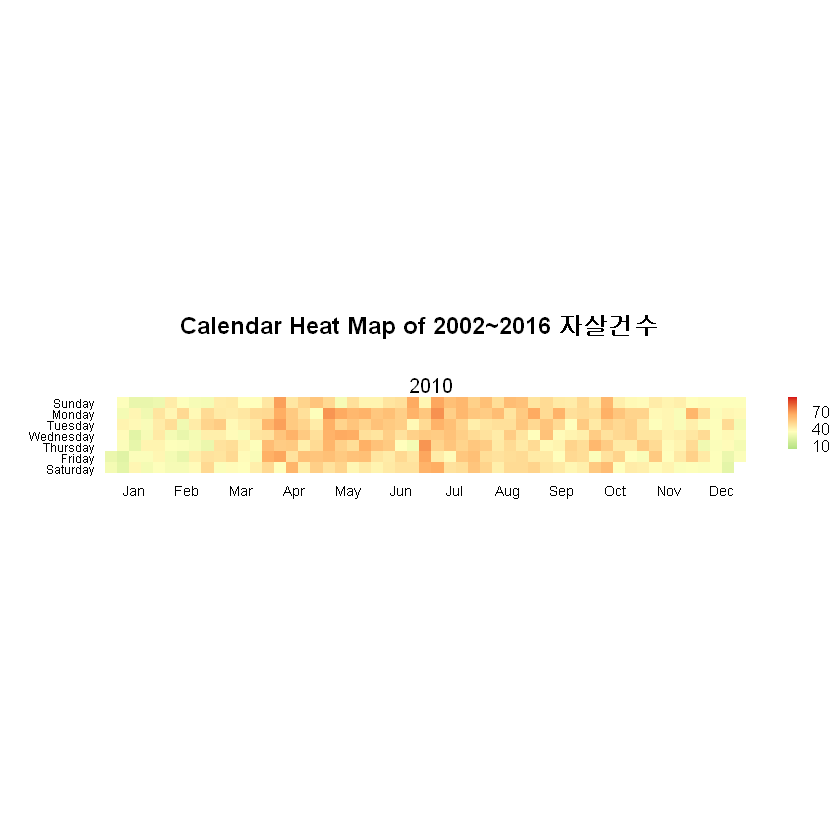

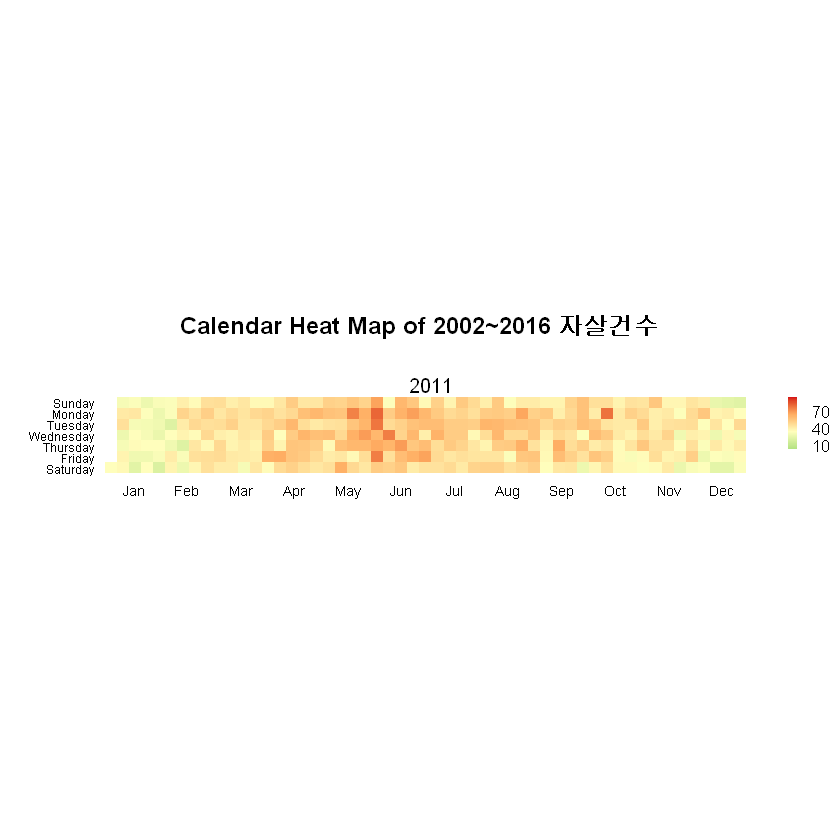

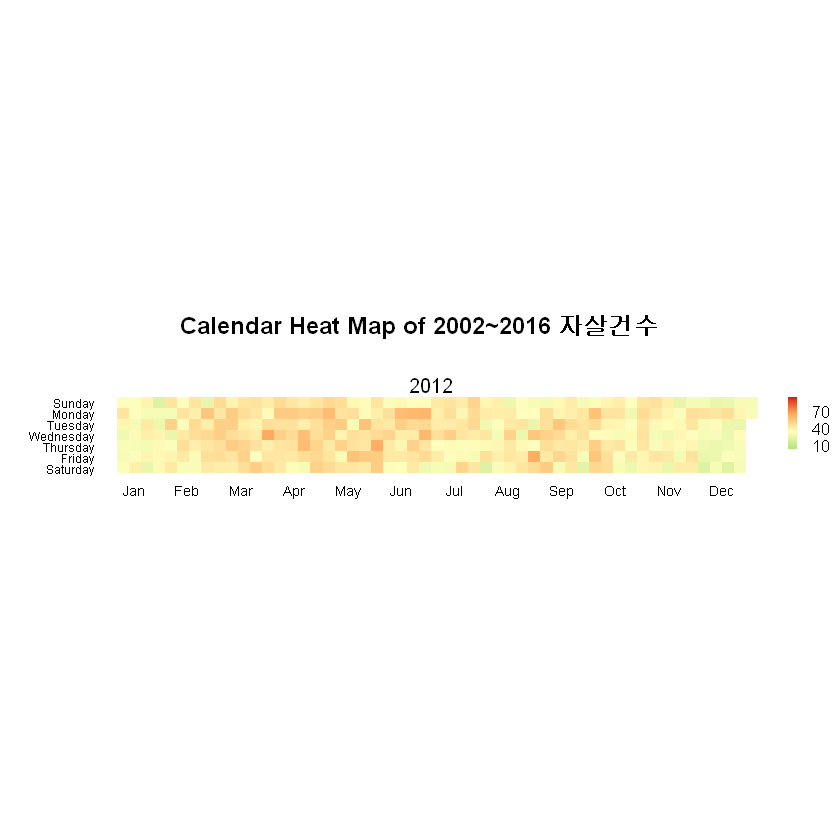

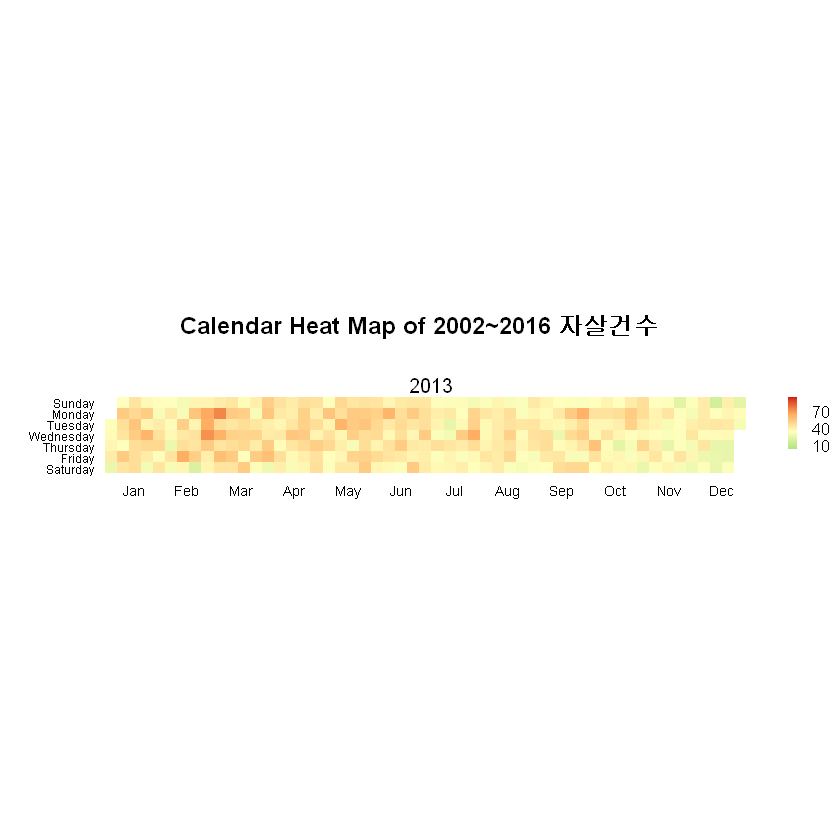

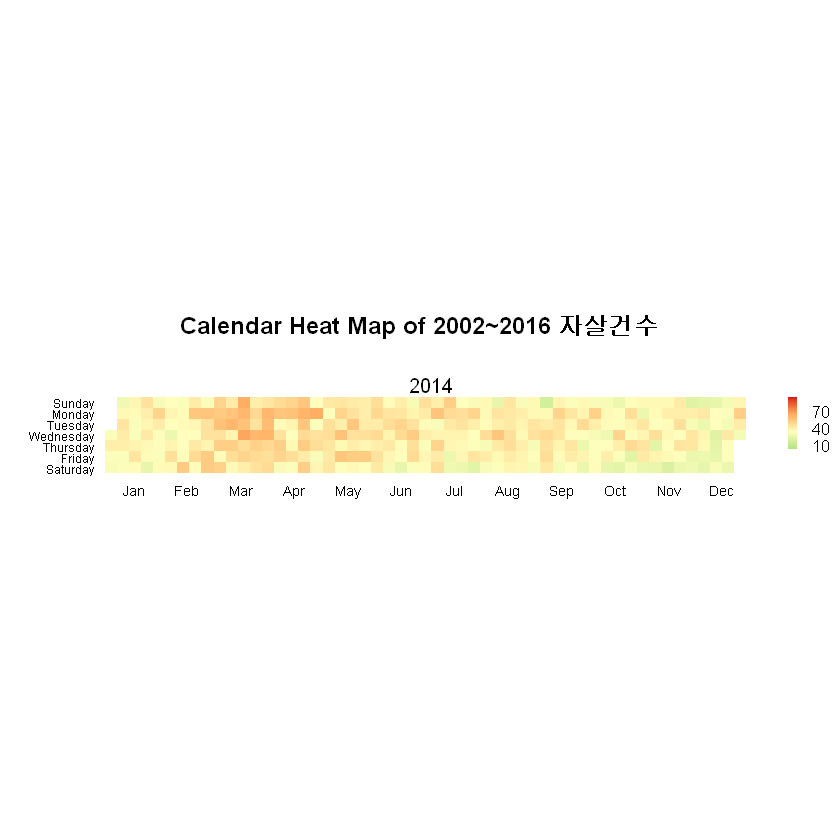

Warning message in trellis.panelArgs():
"Plot spans multiple pages, only last page can be updated"

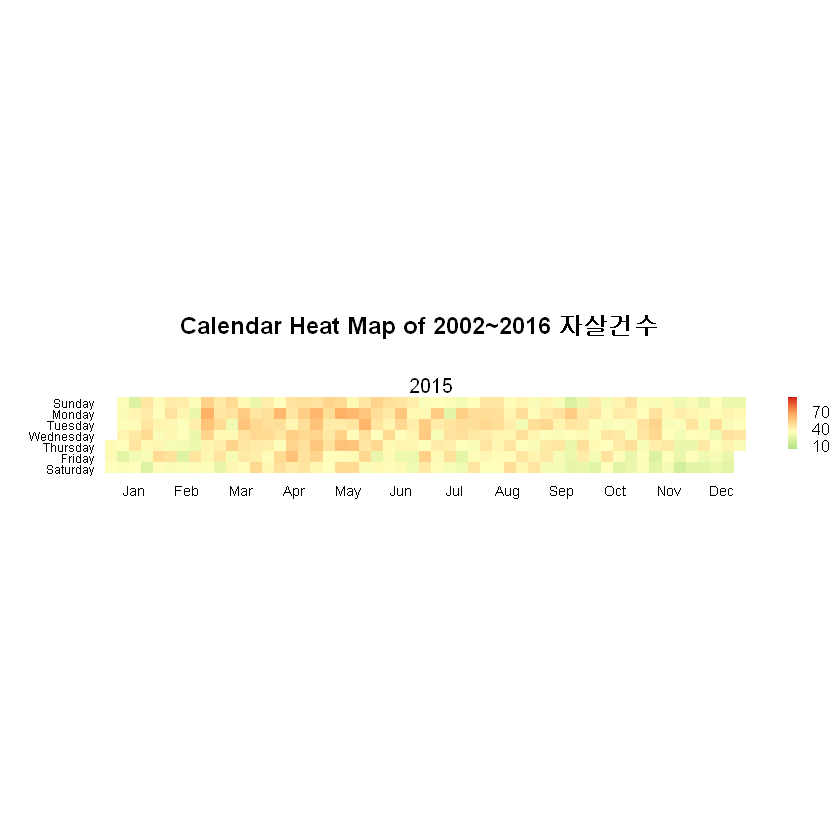

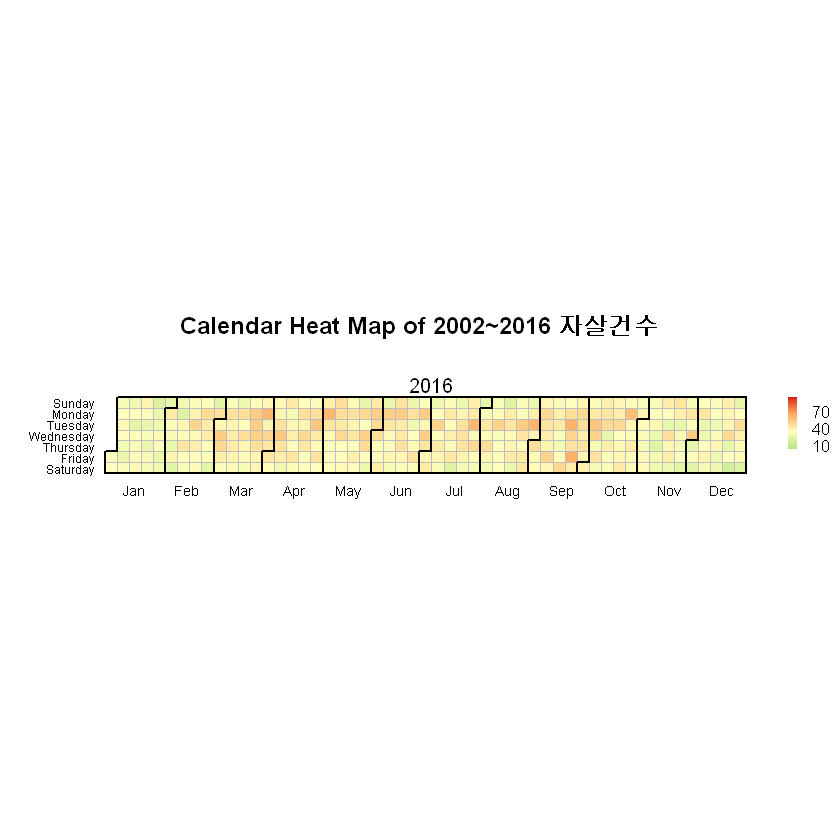

In [24]:
url="https://raw.githubusercontent.com/iascchen/VisHealth/master/R/calendarHeat.R" 
source(url)
g2r <- rev(c("#D61818", "#FFAE63", "#FFFFBD", "#B5E384") )
suicide$사망날짜 = paste(suicide$사망_년, suicide$사망_월, suicide$사망_일, sep="-")
count = table(suicide$사망날짜)
calendarHeat(dates=rownames(count), values=count, color="g2r", varname="2002~2016 자살건수")

#### 연령대별 자살률

In [1]:
install.packages('RColorBrewer', repos='http://cran.us.r-project.org')

package 'RColorBrewer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\student\AppData\Local\Temp\RtmpWAHUCn\downloaded_packages


In [25]:
library("RColorBrewer")

Warning message:
"package 'RColorBrewer' was built under R version 3.5.2"

In [26]:
color = brewer.pal(10, "Paired")

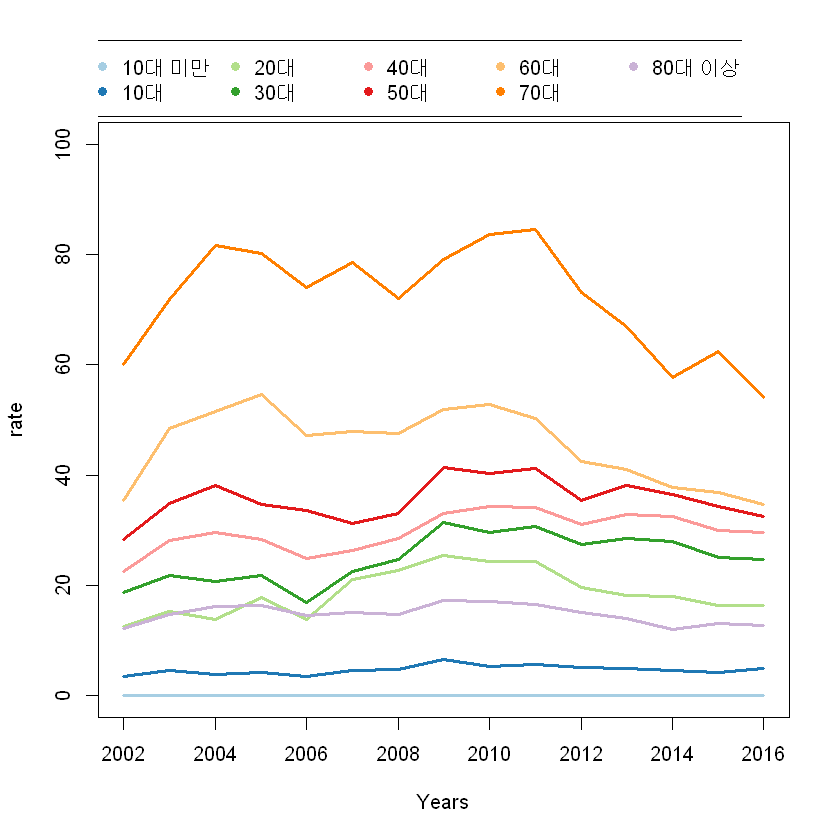

In [27]:
plot.new()
par(mfrow=c(1,1),mar=c(1,4.1,0,4.1))
plot.new()
legend("top", ncol=5,inset=.05, legend=rownames(year_age),pch=16, col = color)
par(new=T)
par(mfrow=c(1,1),mar=c(5.1,4.1,5.1,2.1))
matplot(colnames(year_age),t(year_age),lwd=3 , xlim = c(2002,2016),ylim = c(0,100),xlab='Years', ylab='rate',col =color, type = "l",lty = 1 )

#### 자살 방법 범주화

In [28]:
suicide$사망원인2 = droplevels(suicide$사망원인2)
suicide$사망원인2 = substr(suicide$사망원인2, 1, 3)
suicide$사망원인2 = as.factor(suicide$사망원인2)

levels(suicide$사망원인2) = list("기타 약물"="X60", "수면제"="X61", "마약 및 환각제"="X62", "기타 약물"="X63", "기타 약물"="X64",
                             "알콜"="X65", "휘발물질"="X66", "가스"="X67", "농약"="X68", "기타 독성물질"="X69",
                             "목맴"="X70", "익사"="X71", "권총발사"="X72", "기타 화기발사"="X73", "기타 화기발사"="X74", 
                             "폭발성 물질"="X75", "불"="X76", "증기"="X77", "예리한 물체"="X78", "둔한 물체"="X79",
                             "추락"="X80", "충돌"="X81", "충돌"="X82", "기타"="X83", "상세불명"="X84")

####  

In [29]:
library(forcats)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



#### 자살 방법 빈도

In [30]:
sort(table(suicide$사망원인2), decreasing=TRUE)
#상위 10개 항목
sui = c("목맴","농약","추락","가스","기타 독성물질","익사","상세불명", "예리한 물체","불","수면제")
suicide10 = suicide[suicide$사망원인2==sui,]


          목맴           농약           추락           가스  기타 독성물질 
         93633          35656          28446          12620           8549 
          익사       상세불명    예리한 물체             불         수면제 
          6674           2929           1723           1304           1185 
          충돌      기타 약물  기타 화기발사       휘발물질           기타 
           979            759            209            134            110 
   폭발성 물질 마약 및 환각제       권총발사           알콜      둔한 물체 
            40             39             30             28             25 
          증기 
             3 

Warning message in `==.default`(suicide$사망원인2, sui):
"두 객체의 길이가 서로 배수관계에 있지 않습니다"Warning message in is.na(e1) | is.na(e2):
"두 객체의 길이가 서로 배수관계에 있지 않습니다"

#### 시간별

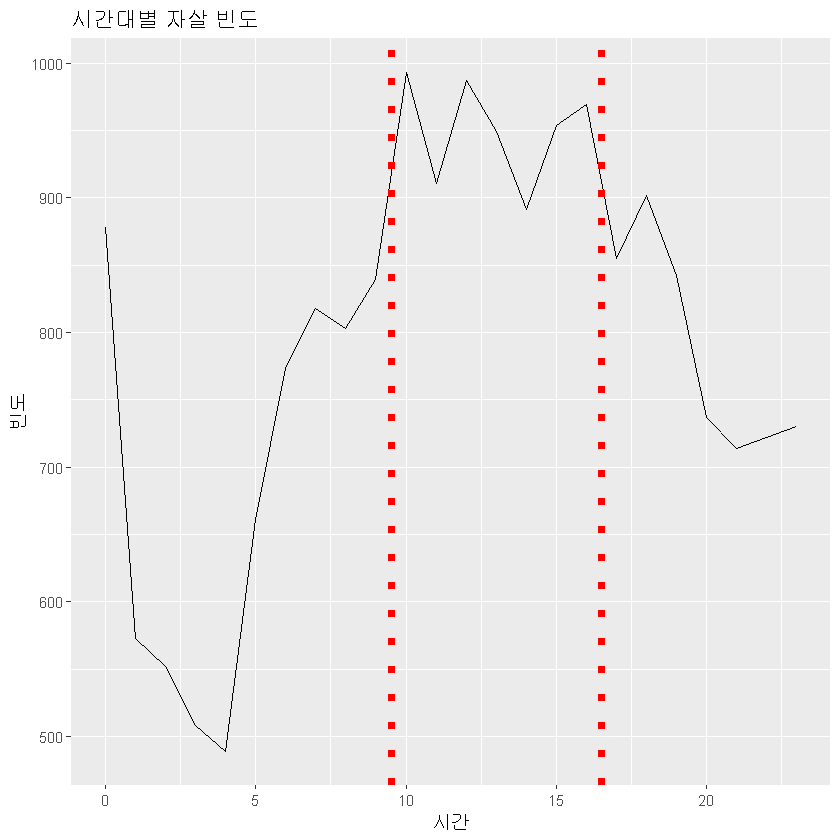

In [31]:
Stime = subset(suicide10, suicide10$사망시간!=99)
Stimefreq = table(Stime$사망시간)
ggplot(Stime, aes(x=사망시간)) +
  geom_line(stat='count') +
  labs(list(title="시간대별 자살 빈도", x="시간", y="빈도"))+
  geom_vline(xintercept=c(9.5,16.5), linetype='dotted', color='red', size=2)

#### 사망 장소 분포


      1       2       3       4       5       6       7       8       9      10 
 973955 2402124   89879    5191  152779   22360   43054    3718   99636   55631 
     99 
   1364 


    1     2     3     4     5     6     7     8     9    10    99 
73062 45078   433  1330 15608  4735 16801   891 12394 24618   125 

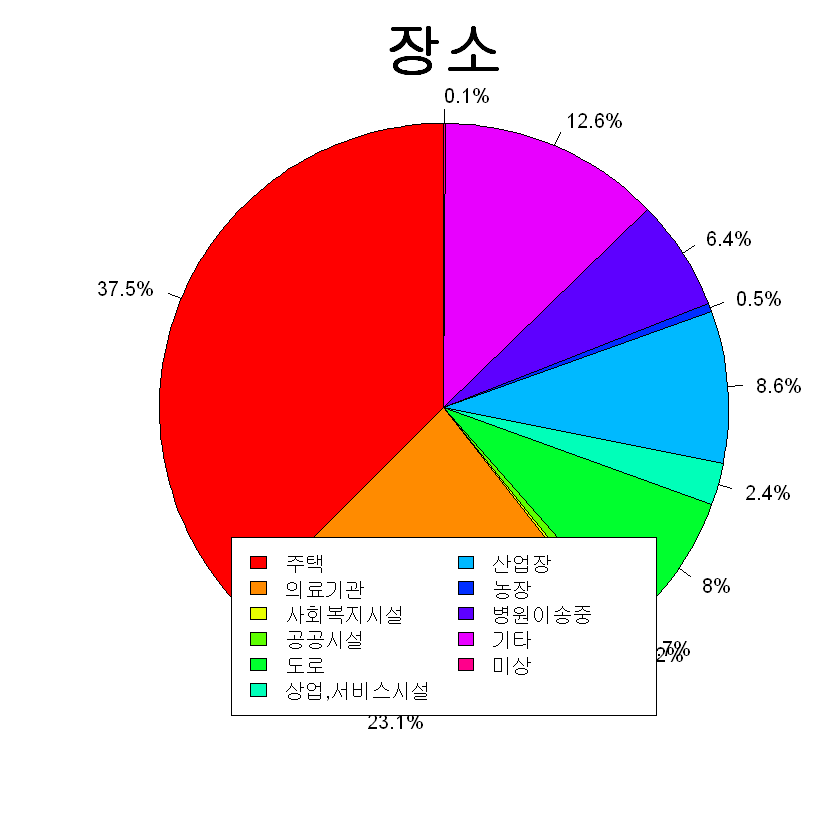

In [32]:
table(death$사망장소)
table(suicide$사망장소)
#99결측치를 11로 수정 99결측치는 장소미상인 것들임.
death$사망장소<-replace(death$사망장소, death$사망장소==99, 11)
suicide$사망장소<-replace(suicide$사망장소, suicide$사망장소==99, 11)

Splace_freq<-table(suicide$사망장소)
Splace_per<-round(Splace_freq/sum(Splace_freq)*100,1)
place<-c("주택","의료기관","사회복지시설","공공시설","도로","상업,서비스시설","산업장","농장","병원이송중","기타","미상")

Splace_lbs<-paste0(Splace_per,"%")

pie(Splace_freq,labels=Splace_lbs,cex.main=3,main="장소",init.angle=90, radius=1,col=rainbow(11))
legend(x="bottom", legend=place, fill=rainbow(11),cex=1, ncol=2)

#### 자살 방법

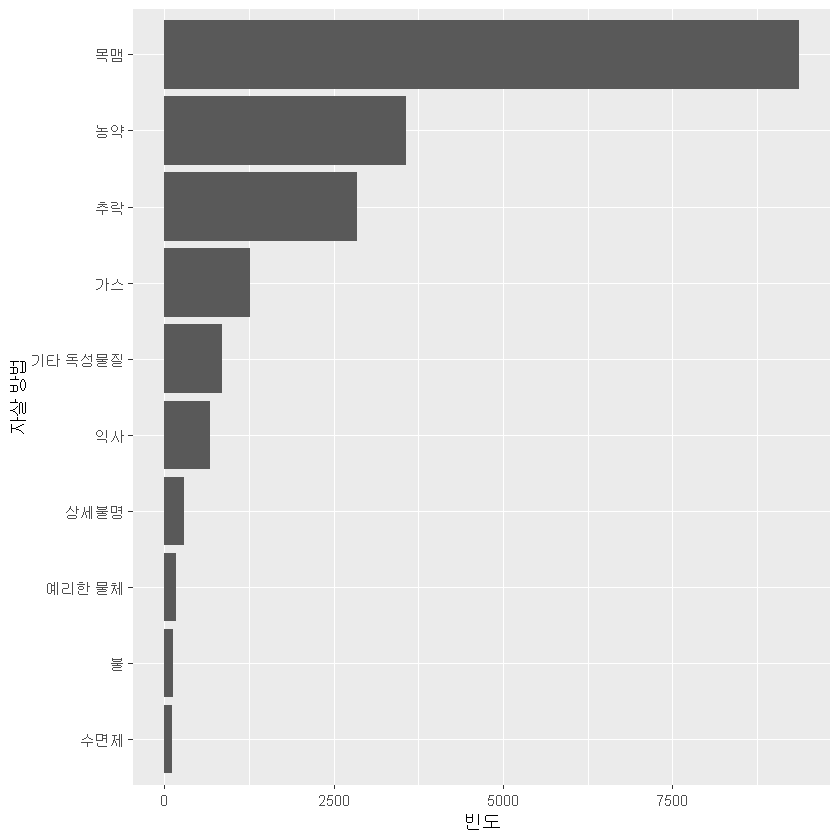

In [33]:
ggplot(data=subset(suicide10, !is.na(사망원인2)), aes(fct_rev(fct_infreq(사망원인2, ordered=TRUE))))+
  geom_bar(stat='count')+
  labs(list(x="자살 방법", y="빈도")) +
  coord_flip()

#### 연령대별 데이터 분류

In [34]:
s00 = subset(suicide, group=="10대 미만")
s10 = subset(suicide, group=="10대")
s20 = subset(suicide, group=="20대")
s30 = subset(suicide, group=="30대")
s40 = subset(suicide, group=="40대")
s50 = subset(suicide, group=="50대")
s60 = subset(suicide, group=="60대")
s70 = subset(suicide, group=="70대")
s80 = subset(suicide, group=="80대 이상")
sNA = subset(suicide, group=="나이 미상")

#### 연령별 - 성별

In [35]:
sexM <- c(nrow(s00[s00$성별==1,]), nrow(s10[s10$성별==1,]),
          nrow(s20[s20$성별==1,]), nrow(s30[s30$성별==1,]),
          nrow(s40[s40$성별==1,]), nrow(s50[s50$성별==1,]),
          nrow(s60[s60$성별==1,]), nrow(s70[s70$성별==1,]),
          nrow(s80[s80$성별==1,]), nrow(sNA[sNA$성별==1,]))

sexF <- c(nrow(s00[s00$성별==2,]), nrow(s10[s10$성별==2,]),
          nrow(s20[s20$성별==2,]), nrow(s30[s30$성별==2,]),
          nrow(s40[s40$성별==2,]), nrow(s50[s50$성별==2,]),
          nrow(s60[s60$성별==2,]), nrow(s70[s70$성별==2,]),
          nrow(s80[s80$성별==2,]), nrow(sNA[sNA$성별==2,]))

In [37]:
install.packages('pyramid', repos='http://cran.us.r-project.org')

package 'pyramid' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\student\AppData\Local\Temp\RtmpG2PcyA\downloaded_packages


In [38]:
install.packages('readxl', repos='http://cran.us.r-project.org')

also installing the dependency 'progress'



package 'progress' successfully unpacked and MD5 sums checked
package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\student\AppData\Local\Temp\RtmpG2PcyA\downloaded_packages


Warning message:
"package 'pyramid' was built under R version 3.5.2"Warning message:
"package 'readxl' was built under R version 3.5.2"

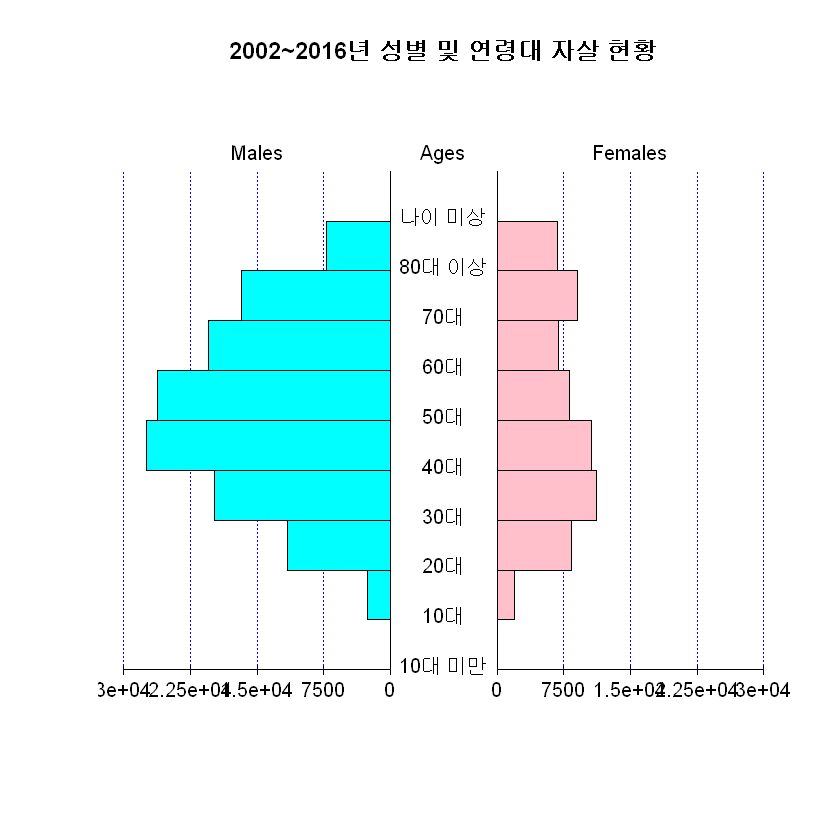

In [39]:
library(pyramid)
library(readxl)

Ssex<- data.frame(sexM,sexF,age)
pyramid::pyramid(Ssex,main="2002~2016년 성별 및 연령대 자살 현황",Laxis=seq(0,30000,len=5),Cstep=1,Cgap = .4)

#### 성별

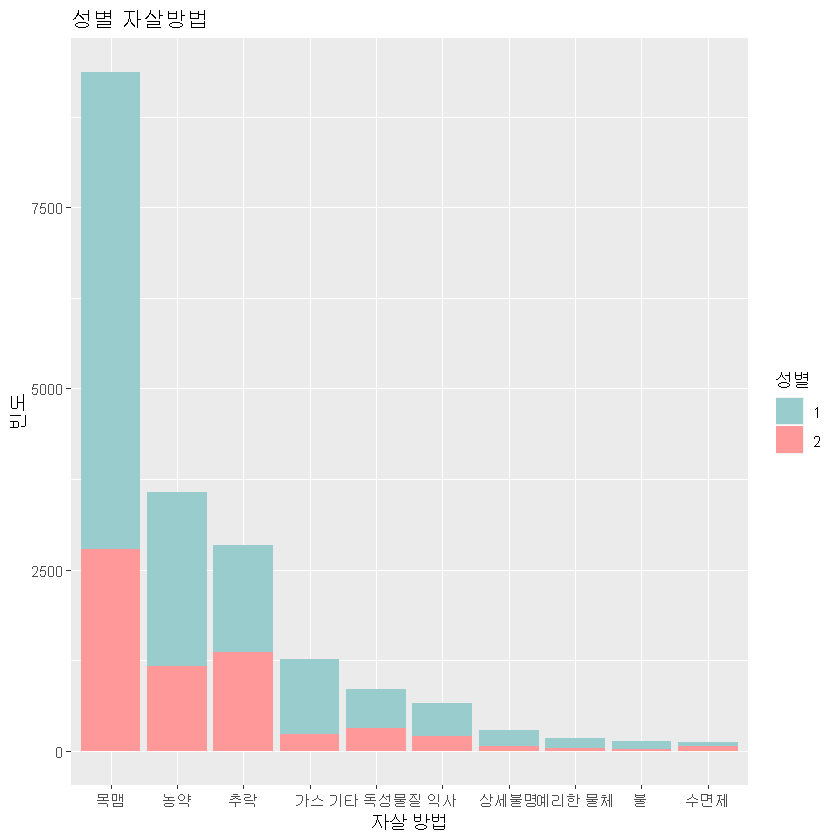

In [40]:
suicide$성별 = as.factor(suicide$성별)
levels(suicide$성별) = list("남자"=1, "여자"=2)

ggplot(data=subset(suicide10, !is.na(사망원인2)), aes(fct_infreq(사망원인2), fill=factor(성별), group=성별)) + 
  geom_bar() + ggtitle("성별 자살방법") +labs(list(x="자살 방법", y="빈도", fill="성별"))+
  scale_fill_manual(values = c( "#99CCCC", "#FF9999"))

#### 연령대별 자살방법

In [41]:
s00_freq<-table(s00$사망원인2)
s00_per<-round(s00_freq*100/sum(s00_freq),1)
s00_lbs<- paste(s00_per, "%", sep="")
s10_freq<-table(s10$사망원인2)
s10_per<-round(s10_freq*100/sum(s10_freq),1)
s10_lbs<- paste(s10_per, "%", sep="")
s20_freq<-table(s20$사망원인2)
s20_per<-round(s20_freq*100/sum(s20_freq),1)
s20_lbs<- paste(s20_per, "%", sep="")
s30_freq<-table(s30$사망원인2)
s30_per<-round(s30_freq*100/sum(s30_freq),1)
s30_lbs<- paste(s30_per, "%", sep="")
s40_freq<-table(s40$사망원인2)
s40_per<-round(s40_freq*100/sum(s40_freq),1)
s40_lbs<- paste(s40_per, "%", sep="")
s50_freq<-table(s50$사망원인2)
s50_per<-round(s50_freq*100/sum(s50_freq),1)
s50_lbs<- paste(s50_per, "%", sep="")
s60_freq<-table(s60$사망원인2)
s60_per<-round(s60_freq*100/sum(s60_freq),1)
s60_lbs<- paste(s60_per, "%", sep="")
s70_freq<-table(s70$사망원인2)
s70_per<-round(s70_freq*100/sum(s70_freq),1)
s70_lbs<- paste(s70_per, "%", sep="")
s80_freq<-table(s80$사망원인2)
s80_per<-round(s80_freq*100/sum(s80_freq),1)
s80_lbs<- paste(s80_per, "%", sep="")

In [42]:
install.packages('randomcoloR', repos='http://cran.us.r-project.org')

also installing the dependencies 'V8', 'Rtsne'



package 'V8' successfully unpacked and MD5 sums checked
package 'Rtsne' successfully unpacked and MD5 sums checked
package 'randomcoloR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\student\AppData\Local\Temp\RtmpG2PcyA\downloaded_packages


Warning message:
"package 'randomcoloR' was built under R version 3.5.2"

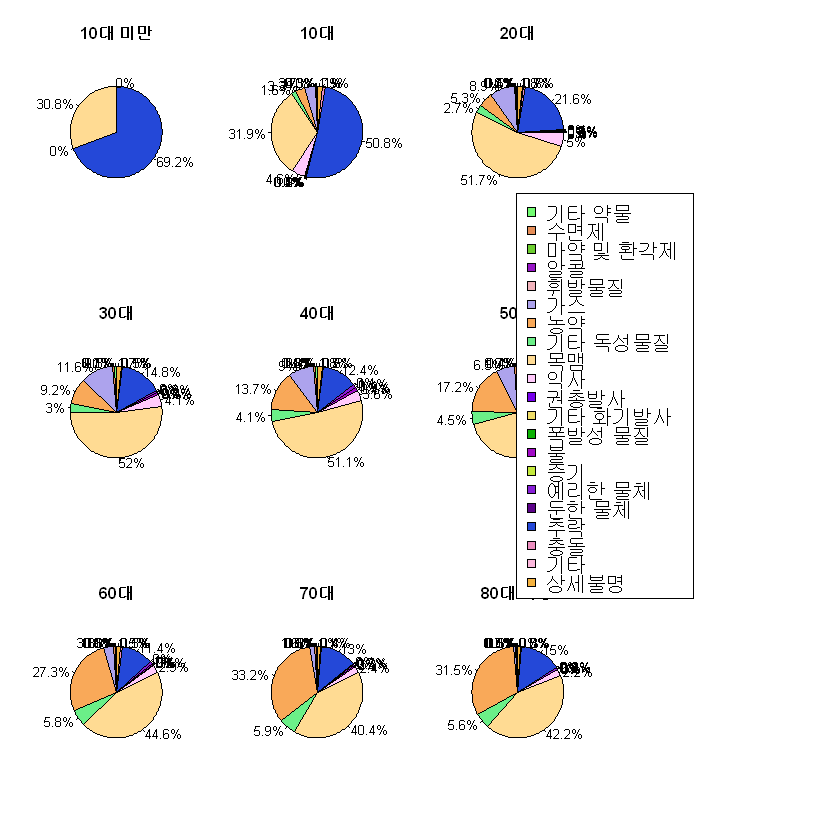

In [43]:
library(randomcoloR)
a<-randomColor(21)
par(mfrow=c(1,1),mar=c(5.1, 4.1, 4.1, 2.1),oma=c(0,0,0,0))
plot.new()

par(mfrow=c(3,3),mar=c(5.1, 4.1, 4.1, 2.1),oma=c(0,0,0,15))

freq00 = table(s00$사망원인2)
pie(freq00, labels=s00_lbs, main="10대 미만", radius=1, init.angle=90,col=a)
freq10 = table(s10$사망원인2)
pie(freq10, labels=s10_lbs, main="10대", radius=1, init.angle=90,col=a)
freq20 = table(s20$사망원인2)
pie(freq20, labels=s20_lbs, main="20대", radius=1, init.angle=90,col=a)
freq30 = table(s30$사망원인2)
pie(freq30, labels=s30_lbs, main="30대", radius=1, init.angle=90,col=a)
freq40 = table(s40$사망원인2)
pie(freq40, labels=s40_lbs, main="40대", radius=1, init.angle=90,col=a)
freq50 = table(s50$사망원인2)
pie(freq50, labels=s50_lbs, main="50대", radius=1, init.angle=90,col=a)
freq60 = table(s60$사망원인2)
pie(freq60, labels=s60_lbs, main="60대", radius=1, init.angle=90,col=a)
freq70 = table(s70$사망원인2)
pie(freq70, labels=s70_lbs, main="70대", radius=1, init.angle=90,col=a)
freq80 = table(s80$사망원인2)
pie(freq80, labels=s80_lbs, main="80대 이상", radius=1, init.angle=90,col=a)


par(mfrow=c(1,1),mar=c(5.1, 4.1, 4.1, 0.2),oma=c(0,0,0,0))
par(new=T)
lbsu<-dimnames(freq00)[[1]]
legend("right",lbsu,fill=a)

####  